In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import zeros, signal, random
import pandas as pd

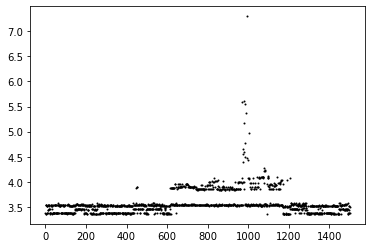

In [193]:
#import data
#interesting examples: ..../Continental/0,2,3,7,30
data = pd.read_csv("../anomalyDetection-main/data/Continental/2", sep = ',',skiprows = 1, header = None)
values = data.iloc[:,1].values
plt.plot(values, 'ko', ms = 1)

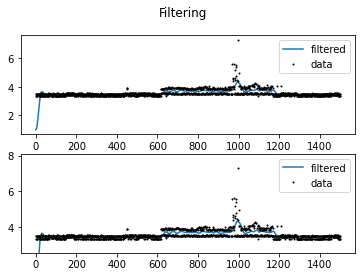

In [194]:
#Butterworth filter
#Lowpass filter, discards oscilations with f > cutoff_frequency



def Butterworth(values):
    filter_order = 3
    cutoff_frequency = 0.05
    results = []
    podatki = []
 
    b, a = signal.butter(filter_order, cutoff_frequency)
    z = signal.lfilter_zi(b, a)

    for i in range(len(values)):
        measurement = values[i]
        result, z = signal.lfilter(b, a, x = [measurement], zi=z)
        results.append(result[0])
        podatki.append(measurement)
    return(results, podatki)


results, podatki = Butterworth(values)
diff = max(values) - min(values)

fig, axs = plt.subplots(2)
fig.suptitle('Filtering')
axs[0].plot(results, label = 'filtered')
axs[0].plot(podatki, 'ko', ms = 1, label = 'data')
axs[0].legend()

axs[1].plot(results, label = 'filtered')
axs[1].plot(podatki, 'ko', ms = 1, label = 'data')
axs[1].set_ylim([min(values) - 0.2*diff, max(values)+0.2*diff])
axs[1].legend()
plt.show()



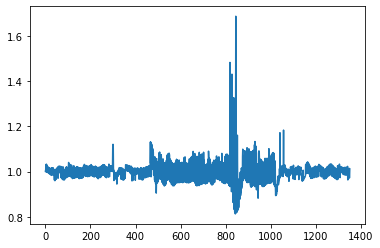

In [195]:
#dividing data by filtered signal should return a spike if there is a sudden change (anomaly)
#if there's a gradual change in data nothing is detected

anomalies = np.divide(podatki[150:], results[150:])
plt.plot(anomalies)

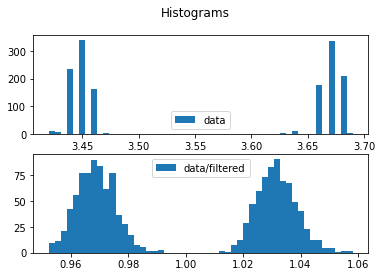

In [197]:

#We often see 2 branches of measurements, example: Continental/0,3,4,7
#Much nicer gaussian distribution if we divide data by filtered signal - 2 clusters separated at 1.0. 
#Could be used to categorise into branches.

data = pd.read_csv("../anomalyDetection-main/data/Continental/3", sep = ',',skiprows = 1, header = None)
values = data.iloc[:,1].values

results, podatki = Butterworth(values)



fig, axs = plt.subplots(2)
fig.suptitle('Histograms')

axs[0].hist(values, bins = 50, label = 'data')
axs[0].legend()

#cut off first 100 - filtered signal still not settled
divided = np.divide(podatki[100:], results[100:])
axs[1].hist(divided, bins = 50, label = 'data/filtered')
axs[1].legend()
plt.show()